<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Imbalanced Classification & NN***

###**Tenggat Waktu: 5 Desember 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab7_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **5 Desember 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1485]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html",
"https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/",
"https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/",
"https://socs.binus.ac.id/2019/12/26/imbalanced-dataset/",
"https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/"
]

In [1486]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


This section is modified by Asisten Dosen KASDD Genap 2022/2023

In [1487]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Imbalanced Classification

Imbalanced datasets adalah kumpulan data yang memiliki ketidakseimbangan dalam distribusi kelas. Terdapat dua keadaan dalam imbalanced data ini, yaitu Slight Imbalance, tidak merata dengan jumlah kecil (misalnya 4:6), dan Severe Imbalance, tidak merata dengan jumlah besar (misalnya 1:1000).

Imbalanced data ini dapat menyebabkan banyak kesalahan dalam suatu pengklasifikasian pada kelas minoritas. Kelas minoritas akan lebih sulit untuk diprediksi karena hanya ada sedikit data pada kelas tersebut jika dibandingkan dengan kelas mayoritas. Data yang tidak seimbang ini dapat pengklasifikasi bias terhadap kelas mayoritas.  Hal ini dikarenakan, pada kasus data tidak seimbang, model klasifikasi akan cenderung berfokus untuk mempelajari karakteristik data pada kelas mayoritas dan cenderung mengabaikan kelas minoritas.

Salah satu pendekatan untuk mengatasi masalah ketidakseimbangan kelas adalah secara acak sampel ulang dataset pelatihan. Dua pendekatan utama untuk sampling secara acak kumpulan data yang tidak seimbang adalah dengan mengurangi contoh-contoh dari kelas mayoritas, yang disebut undersampling, dan untuk menambah contoh-contoh untuk kelas minoritas, yang disebut oversampling.

### Oversampling Techniques

Oversampling adalah suatu metode dalam **memperbanyak** data minoritas. Dengan begitu, model klasifikasi dapat lebih mempelajari karakteristik untuk data minoritas. Terdapat beberapa teknik dalam melakukan oversampling, seperti Random Oversampling, Synthetic Minority Oversampling Technique (SMOTE), Borderline-SMOTE, Borderline Oversampling with SVM, dan Adaptive Synthetic Sampling (ADASYN). Konsep dari penerapan kelima teknik ini dapat dilihat pada slide scele yang tentunya sudah kalian pelajari di kelas.

Berikut ini merupakan contoh data dengan imbalanced classification.

In [1488]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter_y = Counter(y)
print(counter_y)


Counter({0: 9900, 1: 100})


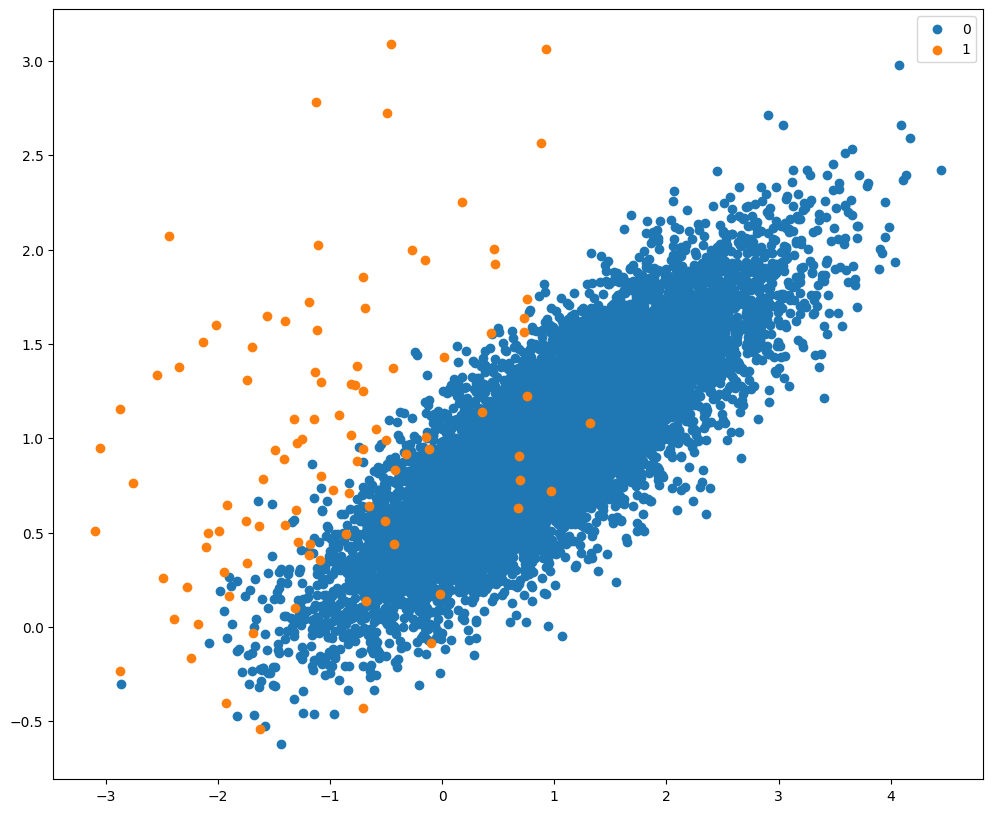

In [1489]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


Dapat dilihat dari contoh data diatas dimana jumlah dari data minoritas sangat jauh lebih sedikit dibandingkan data mayoritasnya. Pada materi ini akan di contohkan salah satu penerapan oversampling dengan menggunakan SMOTE.

#### Synthetic Minority Oversampling Technique (SMOTE)


Teknik Oversampling Minoritas Sintetis (SMOTE) adalah teknik statistik untuk meningkatkan jumlah kasus dalam himpunan data Anda dengan cara yang seimbang. Komponen bekerja dengan menghasilkan contoh (instance) baru dari kasus minoritas yang Anda berikan sebagai input. Implementasi SMOTE ini tidak mengubah jumlah kasus mayoritas.

Instans baru bukan hanya salinan kasus minoritas yang ada. Sebagai gantinya, algoritma mengambil sampel ruang fitur untuk setiap kelas target dan tetangga terdekatnya. Algoritma kemudian menghasilkan contoh baru yang menggabungkan fitur kasus target dengan fitur tetangganya. Pendekatan ini meningkatkan fitur yang tersedia untuk setiap kelas dan membuat sampel lebih umum.

SMOTE mengambil seluruh himpunan data sebagai input, tetap hanyai meningkatkan persentase kasus minoritas. Misalnya, Anda memiliki himpunan data yang tidak seimbang di mana hanya 1 persen kasus yang memiliki nilai target A (kelas minoritas), dan 99 persen kasus memiliki nilai B. Untuk meningkatkan persentase kasus minoritas menjadi dua kali persentase sebelumnya, Anda perlu memasukkan 200 untuk persentase SMOTE di properti komponen.

Ref: https://learn.microsoft.com/id-id/azure/machine-learning/component-reference/smote

Berikut ini contoh penerapan SMOTE dalam imbalanced clasification

In [1490]:
# transform the dataset
smote = SMOTE()

# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_smote = Counter(y_smote)
print(counter_y_smote)


Counter({0: 9900, 1: 9900})


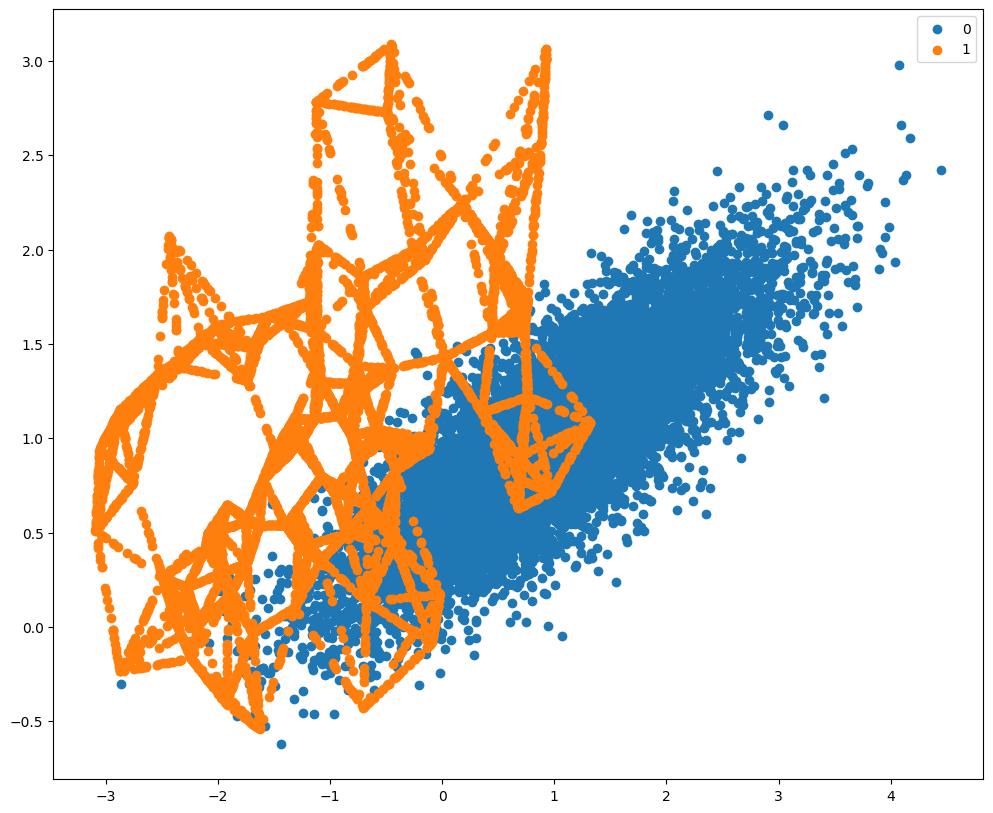

In [1491]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

#### Penerapan oversampling lainnya

##### Random Oversampling

In [1492]:
# define oversampling strategy
randomSample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = randomSample.fit_resample(X, y)

# summarize class distribution
counter_y_over = Counter(y_over)
print(counter_y_over)

Counter({0: 9900, 1: 9900})


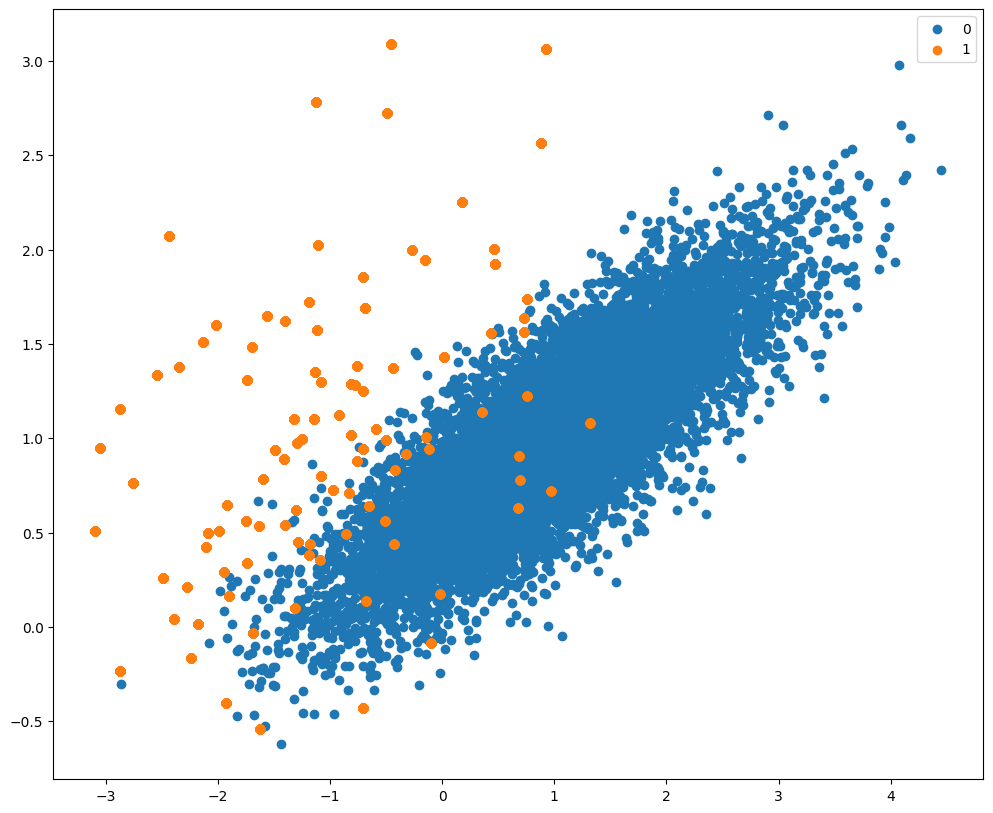

In [1493]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_over.items():
    row_ix = where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Borderline-SMOTE

In [1494]:
# transform the dataset
borderline_smote = BorderlineSMOTE()

# fit and apply the transform
X_borderline_smote, y_borderline_smote = smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({0: 9900, 1: 9900})


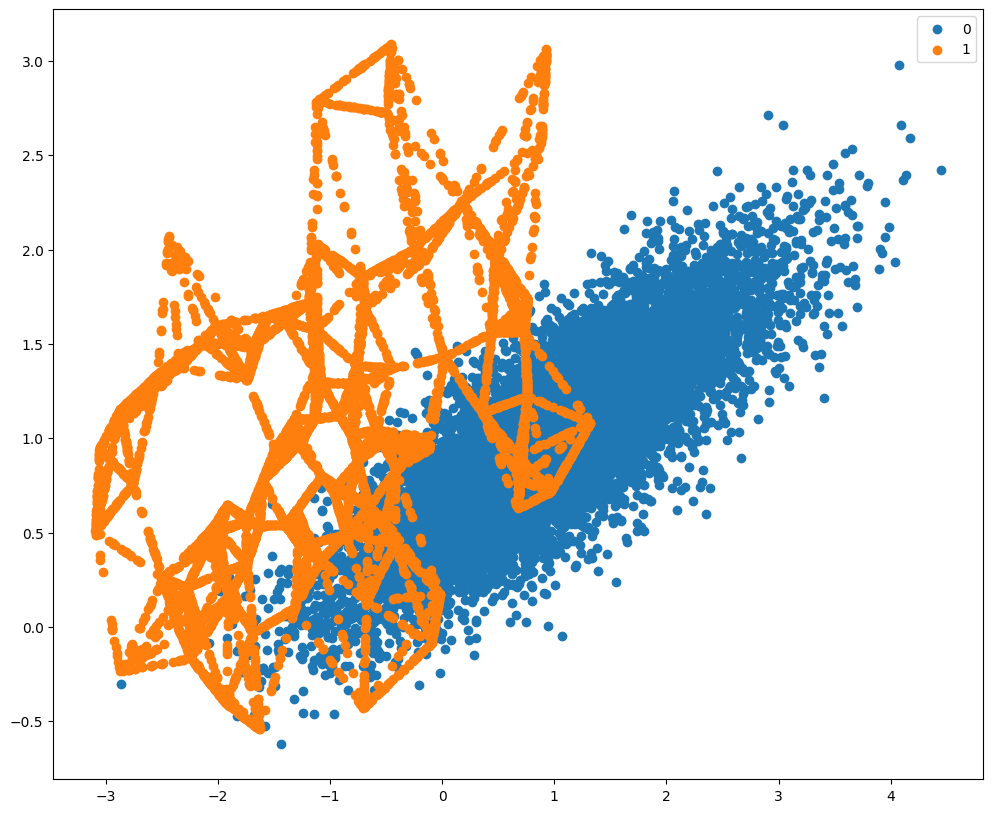

In [1495]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_borderline_smote.items():
    row_ix = where(y_borderline_smote == label)[0]
    pyplot.scatter(X_borderline_smote[row_ix, 0], X_borderline_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

##### Borderline Oversampling with SVM

In [1496]:
# transform the dataset
svm_smote = SVMSMOTE()

# fit and apply the transform
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# summarize the new class distribution
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)


Counter({0: 9900, 1: 9900})


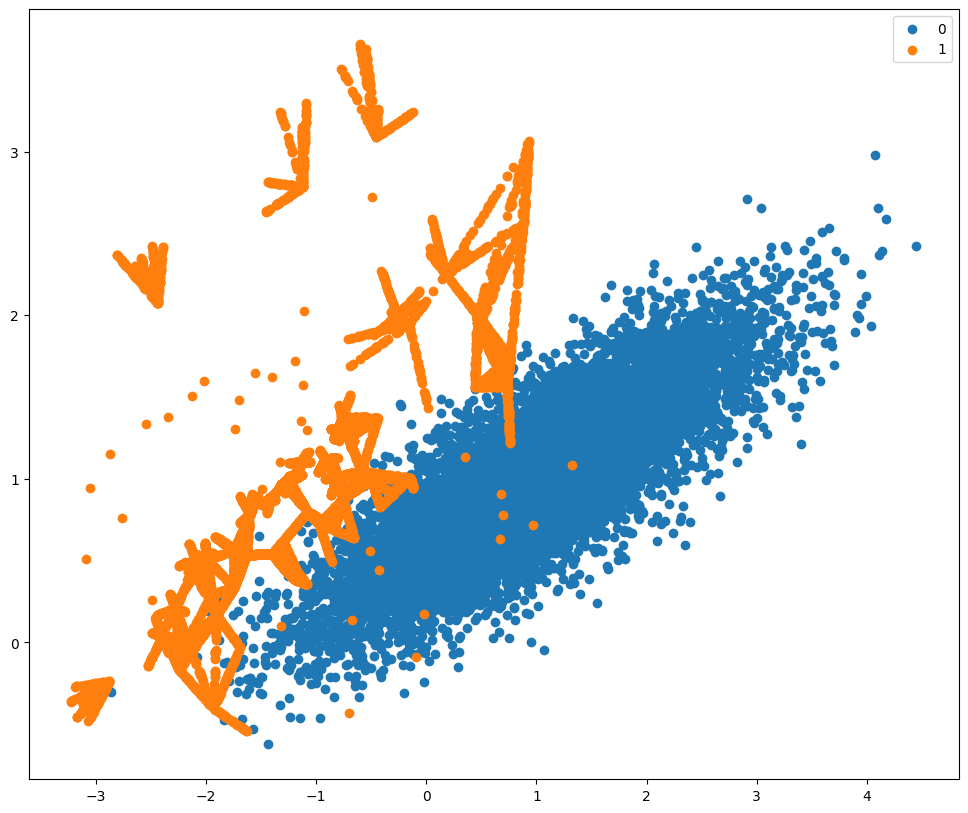

In [1497]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm_smote.items():
    row_ix = where(y_svm_smote == label)[0]
    pyplot.scatter(X_svm_smote[row_ix, 0],
                   X_svm_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Adaptive Synthetic Sampling (ADASYN)

In [1498]:
# transform the dataset
adasyn = ADASYN()

# fit and apply the transform
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# summarize the new class distribution
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)


Counter({0: 9900, 1: 9899})


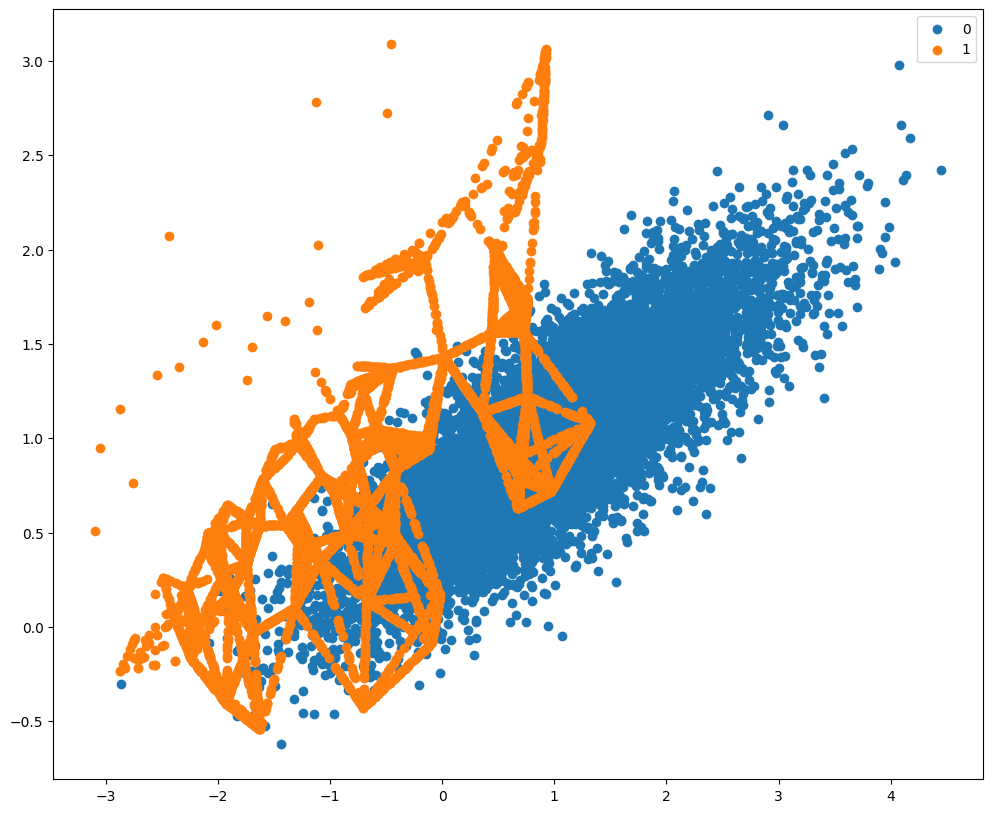

In [1499]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_adasyn.items():
    row_ix = where(y_adasyn == label)[0]
    pyplot.scatter(X_adasyn[row_ix, 0],
                   X_adasyn[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


### Undersampling Techniques

Undersampling adalah suatu metode dalam **mengurangi** data mayoritas. Terdapat beberapa teknik dalam melakukan undersampling, seperti Random Undersampling, Condensed Nearest Neighbor Rule (CNN), dan Near Miss Undersampling. Konsep dari penerapan Random Undersampling dan Near Miss Undersampling ini dapat dilihat pada slide scele yang tentunya sudah kalian pelajari di kelas.

Berikut ini merupakan contoh data dengan imbalanced classification.

In [1500]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.90], flip_y=0, random_state=1)
                           
# summarize class distribution
counter_y = Counter(y)
print(counter_y)


Counter({0: 9001, 1: 999})


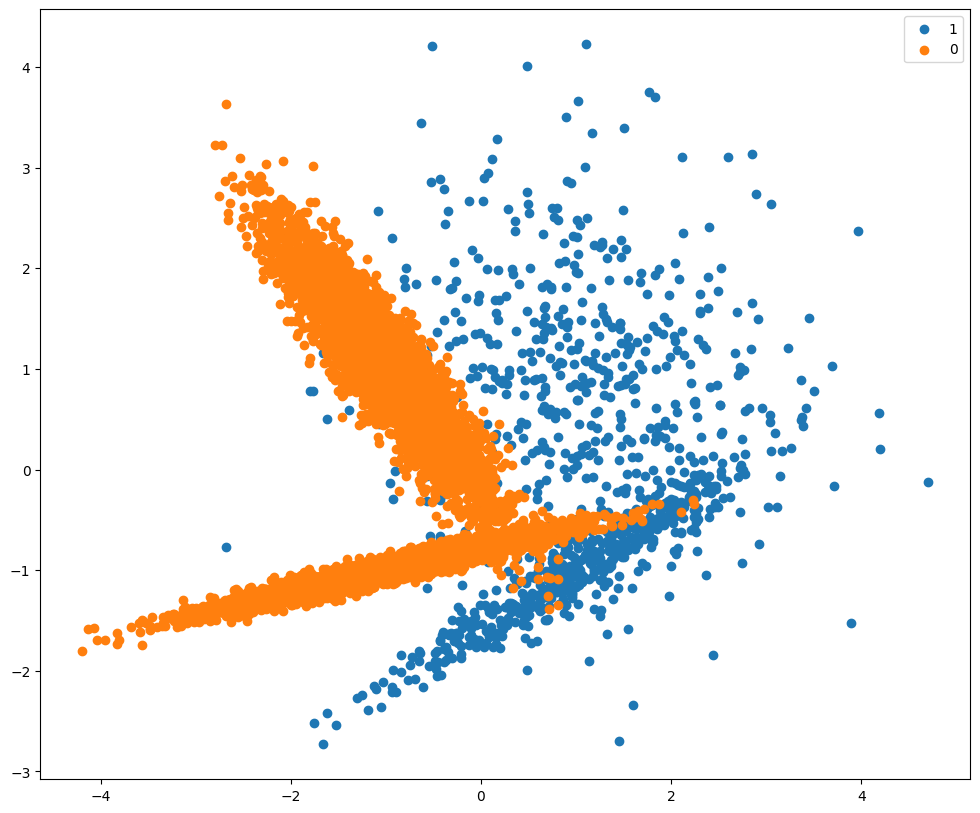

In [1501]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], 
                   X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


Dapat dilihat dari contoh data diatas dimana jumlah dari data minoritas sangat jauh lebih sedikit dibandingkan data mayoritasnya. Pada materi ini akan di contohkan salah satu penerapan undersampling dengan menggunakan Near Miss Undersampling dengan version 1.

#### Near Miss Undersampling

Near Miss mengacu pada kumpulan metode undersampling yang memilih contoh berdasarkan jarak contoh kelas mayoritas ke contoh kelas minoritas.

Terdapat tiga versi dalam penerapan Near Miss, yaitu NearMiss-1, NearMiss-2, dan NearMiss-3.
*   NearMiss-1 : memilih contoh dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga contoh terdekat dari kelas minoritas. 

*   NearMiss-2 : memilih contoh dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga contoh terjauh dari kelas minoritas. 

*   NearMiss-3 : memilih sejumlah contoh kelas mayoritas untuk setiap contoh di kelas minoritas yang paling dekat.

Berikut ini contoh penerapan Near Miss Undersampling dengan version 1 dalam imbalanced clasification

In [1502]:
# define undersample strategy
nearmiss = NearMiss()

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({0: 999, 1: 999})


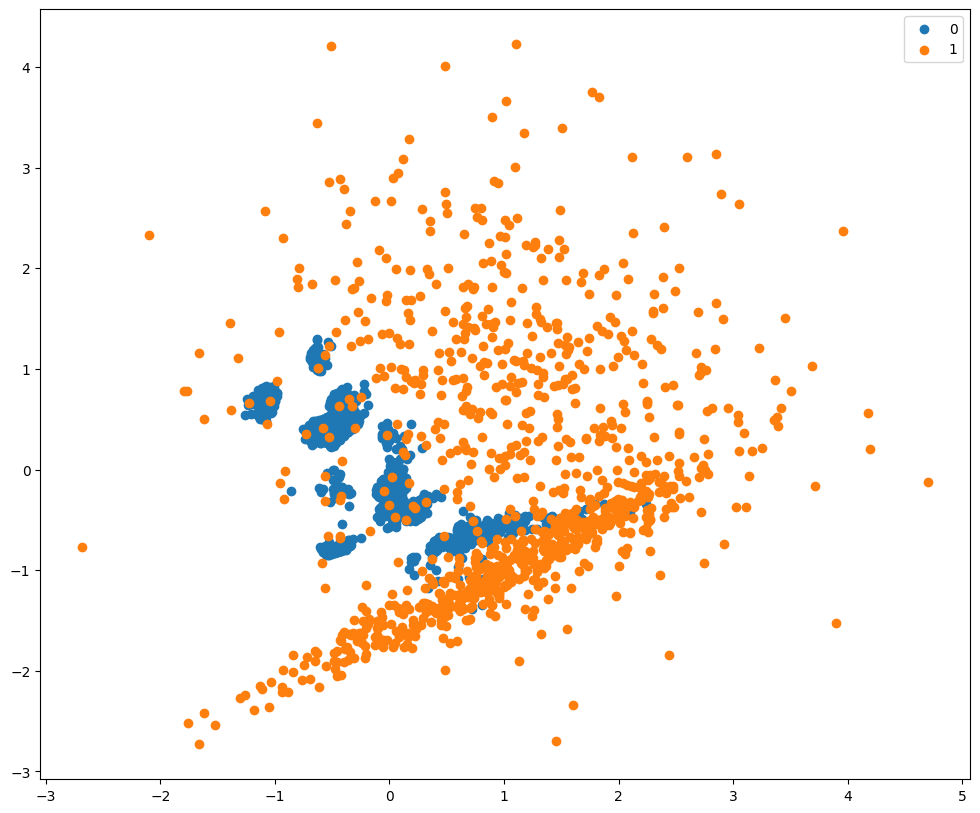

In [1503]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Penerapan Undersampling

##### Random Undersampling

In [1504]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_undersample, y_undersample = undersample.fit_resample(X, y)

# summarize class distribution
counter_y_undersample = Counter(y_undersample)
print(counter_y_undersample)


Counter({0: 999, 1: 999})


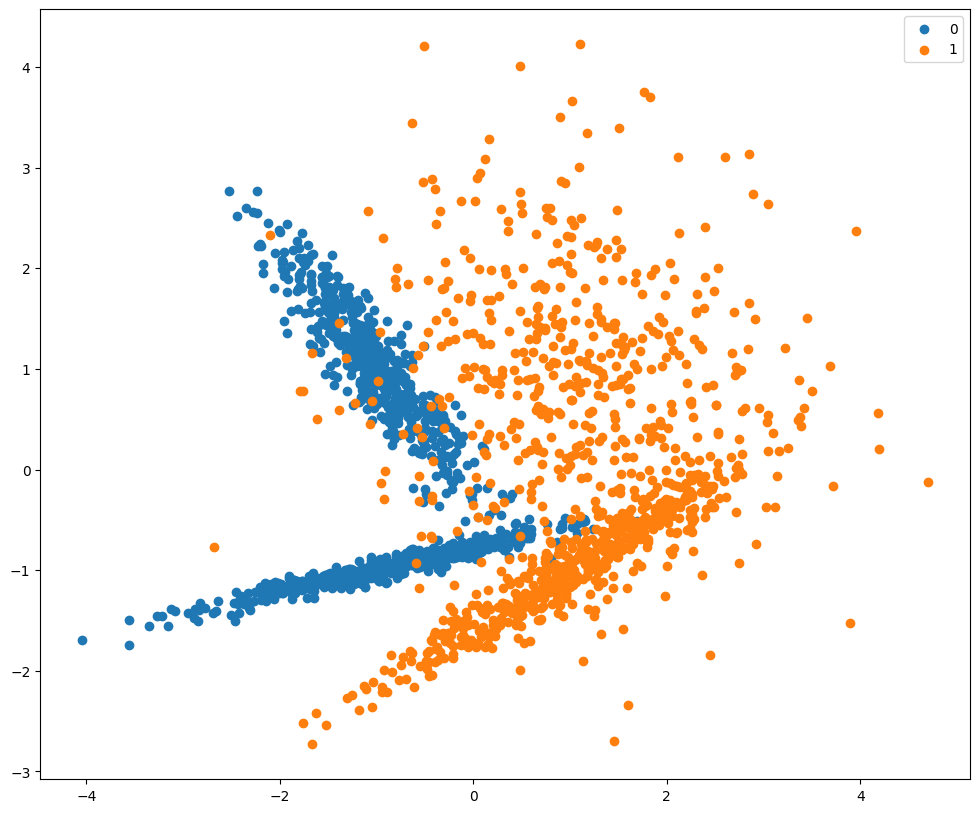

In [1505]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_undersample.items():
    row_ix = where(y_undersample == label)[0]
    pyplot.scatter(X_undersample[row_ix, 0],
                   X_undersample[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Near Miss Undersampling Versi 2

In [1506]:
# define undersample strategy
nearmiss = NearMiss(version=2)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({0: 999, 1: 999})


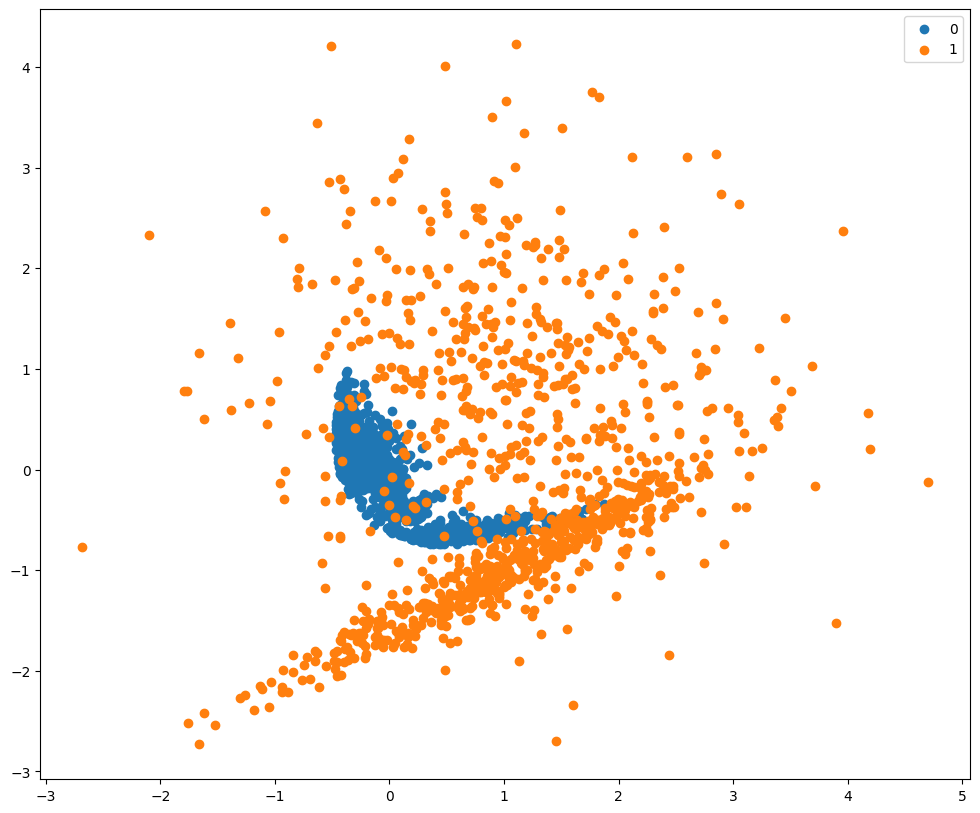

In [1507]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


##### Near Miss Undersampling Versi 3

In [1508]:
# define undersample strategy
nearmiss = NearMiss(version=3)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)


Counter({1: 999, 0: 284})


c:\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


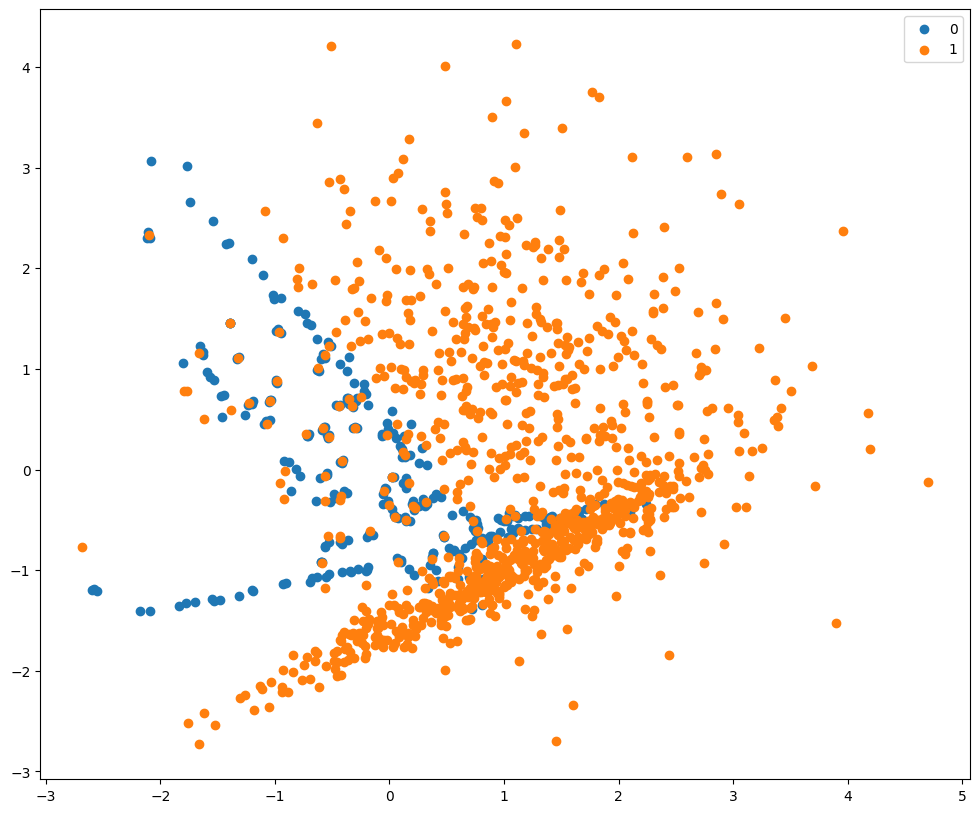

In [1509]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()


# Neural Network

## Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

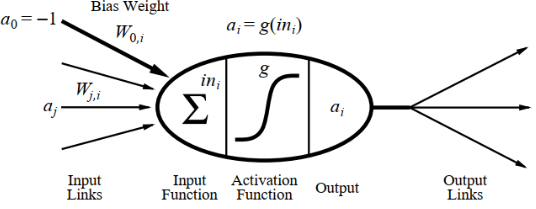

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

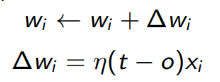

Penjelasan variabel pada rumus:
- $w_i$ merupakan weight untuk input ke-i
- $x_i$ merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

## Klasifikasi Menggunakan NN
Pada bagian ini kita akan melakukan klasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn.

In [1510]:
# Prepare dataset
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=cols)

dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor


Kemudian, kita akan melakukan beberapa preprocessing sederhana seperti melakukan normalisasi pada dataset, melakukan train-test split, serta mengubah target variable agar dapat masuk ke dalam MLPClassifier

In [1511]:
# Normalisasi menggunakan MinMax.
col_no_species = list(dataset[dataset.columns.difference(['species'])])
dataset_norm = dataset[col_no_species].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [1512]:
dataset_norm.sample(5)

,petal_length,petal_width,sepal_length,sepal_width
66,0.593220,0.583333,0.361111,0.416667
29,0.101695,0.041667,0.111111,0.500000
41,0.050847,0.083333,0.055556,0.125000
48,0.084746,0.041667,0.277778,0.708333
26,0.101695,0.125000,0.194444,0.583333


In [1513]:
# Mengubah target variable
species_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
species_code = [1, 2, 3]

dict_replace = dict(zip(species_name, species_code))
y = dataset["species"].replace(dict_replace)

dataset = pd.concat([dataset_norm, y], axis=1)
dataset.sample(5)

,petal_length,petal_width,sepal_length,sepal_width,species
137,0.762712,0.708333,0.583333,0.458333,3
101,0.694915,0.750000,0.416667,0.291667,3
14,0.033898,0.041667,0.416667,0.833333,1
9,0.084746,0.000000,0.166667,0.458333,1
141,0.694915,0.916667,0.722222,0.458333,3


In [1514]:
# Melakukan train-test split
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah melakukan preprocessing pada dataset kita dapat memulai proses training pada model.

In [1515]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='adam', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50,20), max_iter=200, 
                           learning_rate_init=0.001, activation='relu')
classifier.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 20), random_state=42)

Hidden layer pada MLP dapat di-konfigurasi melalui hyperparameter **hidden_layer_sizes**. Pada contoh diatas terdapat satu hidden layer dengan 100 units pada hidden layer tersebut. Jika kita ingin membuat suatu model dengan 3 hidden layer dengan 20 units pada setiap hidden layer, kita dapat melakukan konfigurasi pada **hidden_layer_sizes** menjadi **hidden_layer_sizes=(20, 20, 20,)**

In [1516]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 1 3 2 3 1 2 3 2 2 3 1 1 1 1 3 3 2 2 3 1 3 1 3 3 3 3 3 1 1]

Ground Truth / Dataset Test Asli
[2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1]


# Pertanyaan

## Dataset

Tugas ini menggunakan <b>Pokemon dataset</b> (Sumber: https://www.kaggle.com/datasets/mihirbindal/the-complete-pokemon-dataset dengan perubahan.)  
Dataset terdiri dari:
 - 11 atribut 
    * name – This column has the English names for those Pokemon
    * generation – The generation of each pokemon, ranging from 1 to 8
    * classfication – A text description of their species
    * abilities – Each column has a list containing all the abilities that the Pokemon can have including hidden abilities
    * height_m – Height of the pokemon in metres
    * weight_kg – Weight of Pokemon in kg
    * type1 – Primary type of Pokemon
    * type2 – Secondary type of the Pokemon
    * is_legendary - is it legendary? 0 for no, 1 for yes
    * is_mythical - is it mythical? 0 for no, 1 for yes
    * is_mega - is it a mega evolved form? 0 for no, 1 for yes
 - 1021 baris data

## Data Target sesuai NPM

Data target

Terdapat 3 data target pada dataset pokemon ini is_legendary, is_mythical dan is_mega
Untuk setiap mahasiswa mendapatkan target sesuai npmnya masing-masing. Berikut ketentuan npm setiap mahasiswa:

Npm dengan digit ke-9
 * 0-2: is_legendary
 * 3-5: is_mythical
 * 6-9: is_mega

## Ketentuan Pembuatan MLPClassifier

Untuk setiap soal dengan pembuatan model MLPClassifier gunakan konfigurasi berikut ini. 
*   solver: sgd
*   hidden_layer_sizes=50
*   alpha: 1e-5
*   random_state: 42
*   max_iter: 150
*   learning_rate_init: 0.2

Kemudian, buat dua model dengan activation function yang berbeda yaitu 'logistic' dan 'relu' [1]


In [1517]:
# Read Data Pokemon
import pandas as pd

df = pd.read_csv("pokemon_data.csv")

classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')

classifier_log = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')

## Data awal

a. Ambil data untuk X (height_m and weight_kg) dan y (target, sesuai npm) [1]

In [1518]:
# Set X and y to array
X = df[['height_m', 'weight_kg']].to_numpy()
y = df["is_legendary"].values

b. Hitung jumlah (counter) target [1]

In [1519]:
counter_y = Counter(y)
print(counter_y)

Counter({0.0: 941, 1.0: 80})


c. Lakukan visualisasi data [2]

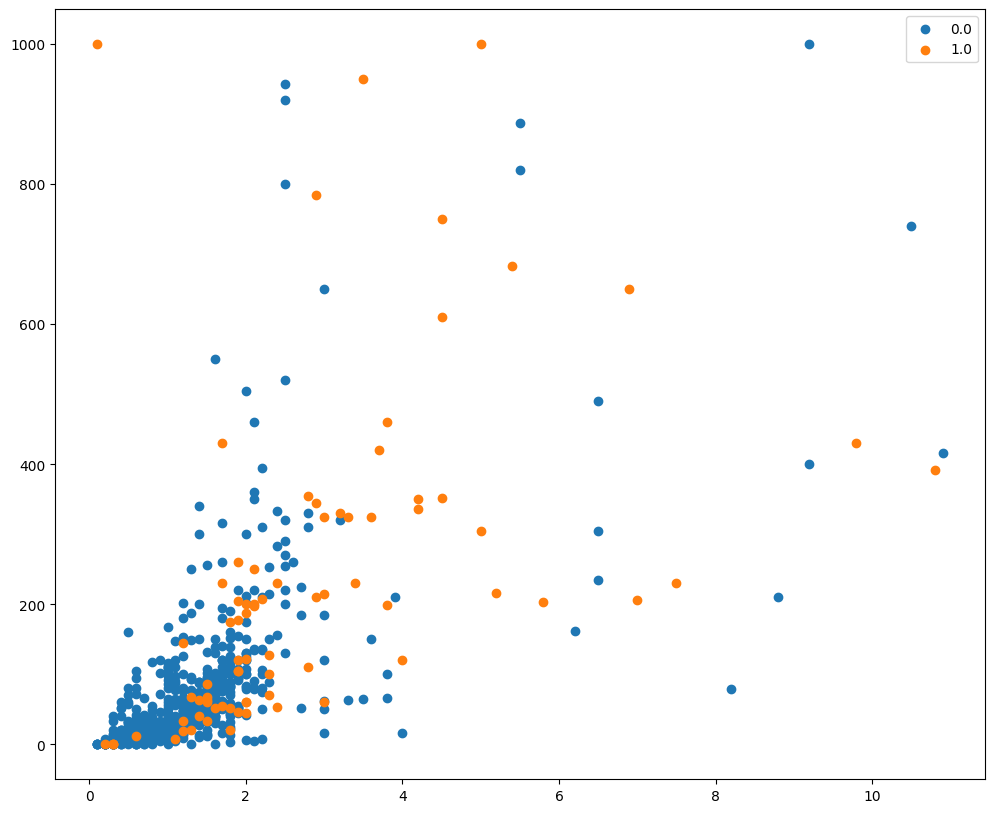

In [1520]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

## Oversample

### Stratified split data

Lakukan splitting terhadap data train dan test dengan jumlah training set adalah sebanyak 80% dari data keseluruhan dengan parameter ```stratify=y```. Mahasiswa juga diperbolehkan untuk mengecek terlebih dahulu data y pada y training dan y testing. [4]

In [1521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Bagian 1

Pilih dua metode oversampling sesuai keinginan anda untuk dipelajari. Namun, lebih baik anda mempelajari seluruhnya (Random Oversampling, SMOTE, BordelineSMOTE, SVMSMOTE, ADASYN)

1. Model 1 [6]

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [1522]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

b. Hitung jumlah (counter) target setelah oversample

In [1523]:

counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0.0: 752, 1.0: 752})


c. Lakukan visualisasi data setelah oversample

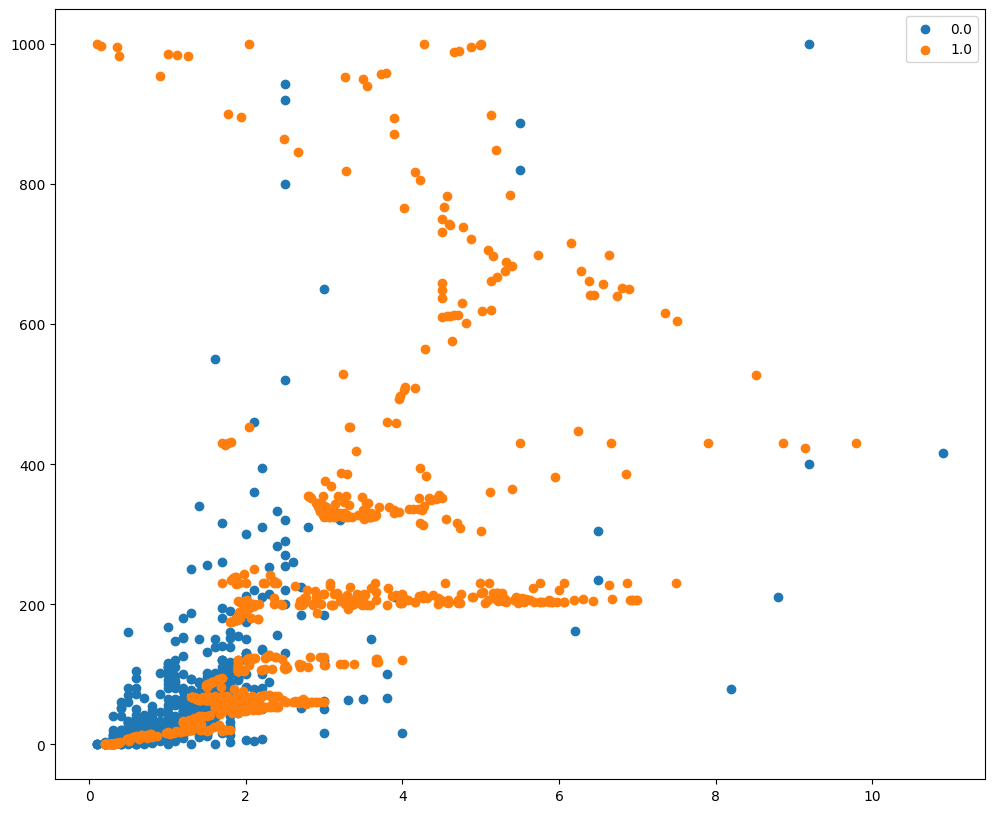

In [1524]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

2. Model 2 [6]

a. Lakukan Oversample pada X and y (training) dengan model yang dipilih

In [1525]:
X_over, y_over = randomSample.fit_resample(X_train, y_train)

b. Hitung jumlah (counter) target setelah oversample

In [1526]:
counter_y_over = Counter(y_over)
print(counter_y_over)

Counter({0.0: 752, 1.0: 752})


c. Lakukan visualisasi data setelah oversample

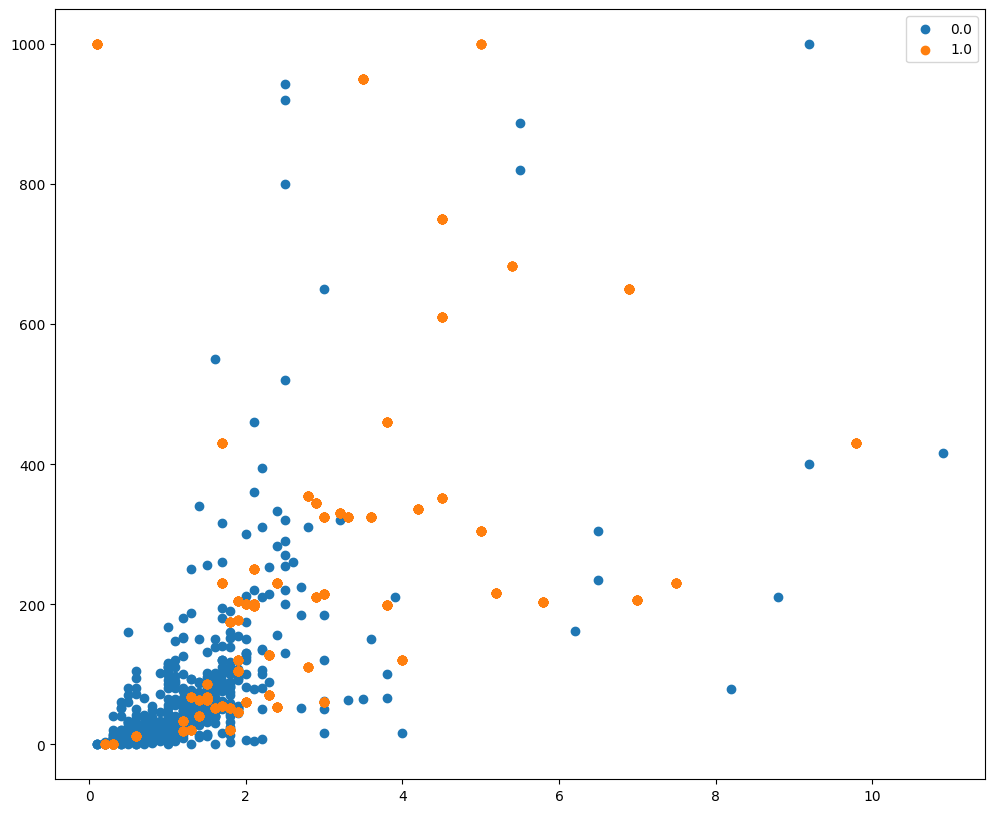

In [1527]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_over.items():
    row_ix = where(y_over == label)[0]
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

3. Adakah perbedaan yang kalian dapat dari dua metode over sample yang kalian lakukan? Jelaskan dengan kata-kata anda sendiri! [5]

Pada kali ini saya menggunakan metode smote dan random sampling. Teknik smote akan mensintesis sampel sampel baru yang dibentuk dari kelas minoritas, hal itu dilakukan dengan cara menduplikasi kelas minoritas ini. Dengan demikian, hasil dari teknik ini adalah akurasi yang baik karena mengurangi overfitting. Pada teknik randomoversampling ini, dia akan melakukan duplikat kelas-kelas minoritas secara acak. Sehingga kemunculan dari kelas minoritas akan lebih dbanyak dibanding sebelumnya. Perbedaan yang dapat diketahui dari kedua model diatas adalah, smote persebaran datanya lebih tinggi dibanding raandomoversampling karena smote itu fokus mensintesis data

### Bagian 2

Lakukan klasifikasi pada data yang belum dan yang sudah di oversampling dengan metode MLP. Untuk data yang sudah di oversampling mahasiswa diminta untuk menerapkan stratified cross validation dan gunakan minimal satu model oversampling (Mahasiswa boleh pakai pipeline ataupun tidak).

1. Lakukanlah klasifikasi menggunakan MLPClassifier dengan data sebelum di oversample [8]

a. Lakukan training pada model MLPClassifier



In [1528]:
classifier_relu.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [1529]:
classifier_log.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

b. Lakukann prediksi data testing

In [1530]:
print("Hasil Prediksi MLPClassifier RELU:")
prediction_relu = classifier_relu.predict(X_test)
print(prediction_relu)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier RELU:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0

In [1531]:
print("Hasil Prediksi MLPClassifier Logistic:")
prediction_log = classifier_log.predict(X_test)
print(prediction_log)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Logistic:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 

c. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [1532]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

print("MLPClassifier RELU")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_relu, average='micro',zero_division=0))

MLPClassifier RELU
Nilai rata-rata akurasi: 0.9219512195121952
F1 Macro Average: 0.47969543147208127
F1 Micro Average: 0.9219512195121952
Precision Macro Average: 0.4609756097560976
Precision Micro Average: 0.9219512195121952
Recall Macro Average: 0.5
Recall Micro Average: 0.9219512195121952


In [1533]:
print("MLPClassifier Logistic")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_log, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_log, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_log, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_log, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_log, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_log, average='micro',zero_division=0))

MLPClassifier Logistic
Nilai rata-rata akurasi: 0.9219512195121952
F1 Macro Average: 0.47969543147208127
F1 Micro Average: 0.9219512195121952
Precision Macro Average: 0.4609756097560976
Precision Micro Average: 0.9219512195121952
Recall Macro Average: 0.5
Recall Micro Average: 0.9219512195121952


2. Lakukan klasifikasi pada data yang telah di oversampling dengan metode MLP dan menerapkan stratified cross validation (Mahasiswa boleh pakai pipeline ataupun tidak) [8]

In [1534]:
classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')

classifier_log = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')

a. Lakukan stratified cross validation dari hasil oversample yang telah dilakukan. Berikan hasilnya.



In [1535]:
# This code may not be run on GFG IDE 
# as required packages are not found. 
    
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }
  
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
                   
   
print("Stratifield KFold ReLU")
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_smote)
  
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_scaled, y_smote):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_smote[train_index], y_smote[test_index]
    classifier_relu.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier_relu.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Stratifield KFold ReLU
List of possible accuracy: [0.8079470198675497, 0.7880794701986755, 0.8013245033112583, 0.8609271523178808, 0.7933333333333333, 0.7933333333333333, 0.7266666666666667, 0.7866666666666666, 0.78, 0.8]

Maximum Accuracy That can be obtained from this model is: 86.09271523178808 %

Minimum Accuracy: 72.66666666666667 %

Overall Accuracy: 79.38278145695364 %

Standard Deviation is: 0.03263027236013863


In [1536]:
# This code may not be run on GFG IDE 
# as required packages are not found. 
    
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }
                   
print("Stratifield KFold Logistic")

lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_scaled, y_smote):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_smote[train_index], y_smote[test_index]
    classifier_log.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier_log.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Stratifield KFold Logistic
List of possible accuracy: [0.8013245033112583, 0.7748344370860927, 0.7880794701986755, 0.8410596026490066, 0.7733333333333333, 0.8, 0.7133333333333334, 0.7866666666666666, 0.7466666666666667, 0.74]

Maximum Accuracy That can be obtained from this model is: 84.10596026490066 %

Minimum Accuracy: 71.33333333333334 %

Overall Accuracy: 77.65298013245034 %

Standard Deviation is: 0.03620772178540788


b. Lakukann training pada model MLPClassifier dengan data training yang telah di oversample

In [1537]:
classifier_relu.fit(X_smote, y_smote)

classifier_log.fit(X_smote, y_smote)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

c. Lakukann prediksi data testing

In [1538]:
print("Hasil Prediksi MLPClassifier RELU:")
prediction_relu = classifier_relu.predict(X_test)
print(prediction_relu)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier RELU:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0

In [1539]:
print("Hasil Prediksi MLPClassifier Logistic:")
prediction_log = classifier_log.predict(X_test)
print(prediction_log)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Logistic:
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 

d. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [1540]:
print("MLPClassifier Logistic")

print("Nilai rata-rata akurasi:", classifier_log.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_log, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_log, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_log, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_log, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_log, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_log, average='micro',zero_division=0))

MLPClassifier Logistic
Nilai rata-rata akurasi: 0.15121951219512195
F1 Macro Average: 0.15119931467732722
F1 Micro Average: 0.15121951219512195
Precision Macro Average: 0.5421052631578948
Precision Micro Average: 0.15121951219512195
Recall Macro Average: 0.5396825396825397
Recall Micro Average: 0.15121951219512195


In [1541]:
print("MLPClassifier RELU")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_relu, average='micro',zero_division=0))

MLPClassifier RELU
Nilai rata-rata akurasi: 0.07804878048780488
F1 Macro Average: 0.07239819004524886
F1 Micro Average: 0.07804878048780488
Precision Macro Average: 0.03902439024390244
Precision Micro Average: 0.07804878048780488
Recall Macro Average: 0.5
Recall Micro Average: 0.07804878048780488


3. Bandingkan hasil dari MLPClassifier: [6] 

*   Tanpa oversample dan dengan oversample [3]. 

*   Perbedaan antara kedua activation function yang dipilih. Menurut anda mana yang lebih baik digunakan ReLU atau Logistic (Sigmoid) Function?[3].


Berikan analisis anda!

1. Diketahui dengan melakukan teknik oversample, akurasi yang dihasilkan lebih rendah dibanding model yang tidak melakukan oversample. Dengan demikian, model tanpa oversample ini lebih baik dibandingkan model dengan oversample. Hal ini juga didukung dengan beberapa metrik evaluasi lainnya, seperti presisi, recall, dan F1-score. 

2. Penggunaan Logistic lebih baik dibanding ReLU. Hal itu disebabkan nilai dari metric lebih baik dibandingkan RuLU, seperti akurasi, F1-score, precision, dan recall. Namun, perbedaan penggunaan Logistic dan RuLE tidak terlalu memiliki nilai perbedaan yang jauh dan masih lebih baik dibanding data yang tidak dioversampling. Selain itu, ini tidak selalu benar karena ketika dirun hasil dari akurasi data yang dioversampling ini bisa berbeda-beda dan tidak konstan, tetapi di kasus ini mayoritas logistic lebih baik dibanding ReLU

## Undersample

### Stratified split data

Lakukan splitting terhadap data train dan test dengan jumlah training set adalah sebanyak 75% dari data keseluruhan dengan parameter ```stratify=y```. Mahasiswa juga diperbolehkan untuk mengecek terlebih dahulu data y pada y training dan y testing. [4]


In [1542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Bagian 1 

1. Lakukanlah undersample menggunakan Random Undersampling [6]

a. Undersample X and y (training) dengan model Random Undersampling 

In [1543]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_undersample, y_undersample = undersample.fit_resample(X_train, y_train)

b. Hitung jumlah (counter) target setelah undersample

In [1544]:
counter_y_undersample = Counter(y_undersample)
print(counter_y_undersample)

Counter({0.0: 60, 1.0: 60})


c. Visualization (setelah undersample)

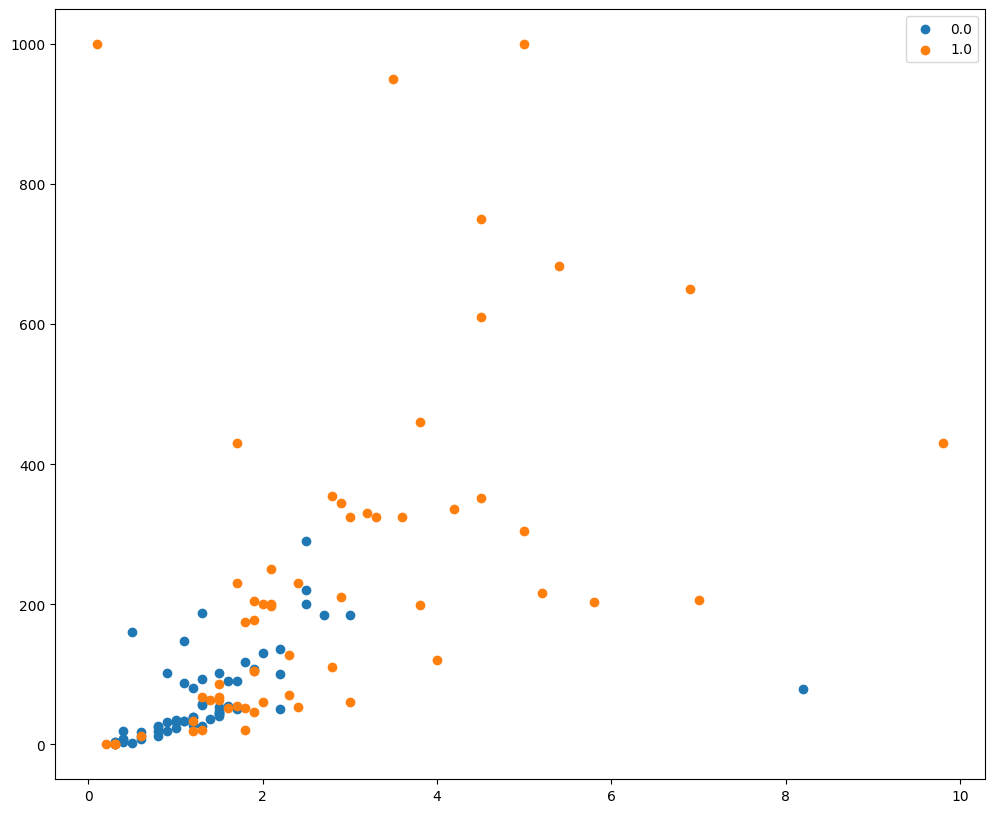

In [1545]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_undersample.items():
    row_ix = where(y_undersample == label)[0]
    pyplot.scatter(X_undersample[row_ix, 0],
                   X_undersample[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

2. Lakukanlah undersample menggunakan NearMiss dengan version 2 atau 3 [6]

a. Undersample X and y (training) dengan model NearMiss

In [1546]:
# define undersample strategy
nearmiss = NearMiss(version=2)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train, y_train)

b. Hitung jumlah (counter) target setelah undersample

In [1547]:
# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({0.0: 60, 1.0: 60})


c. Visualization (setelah undersample)

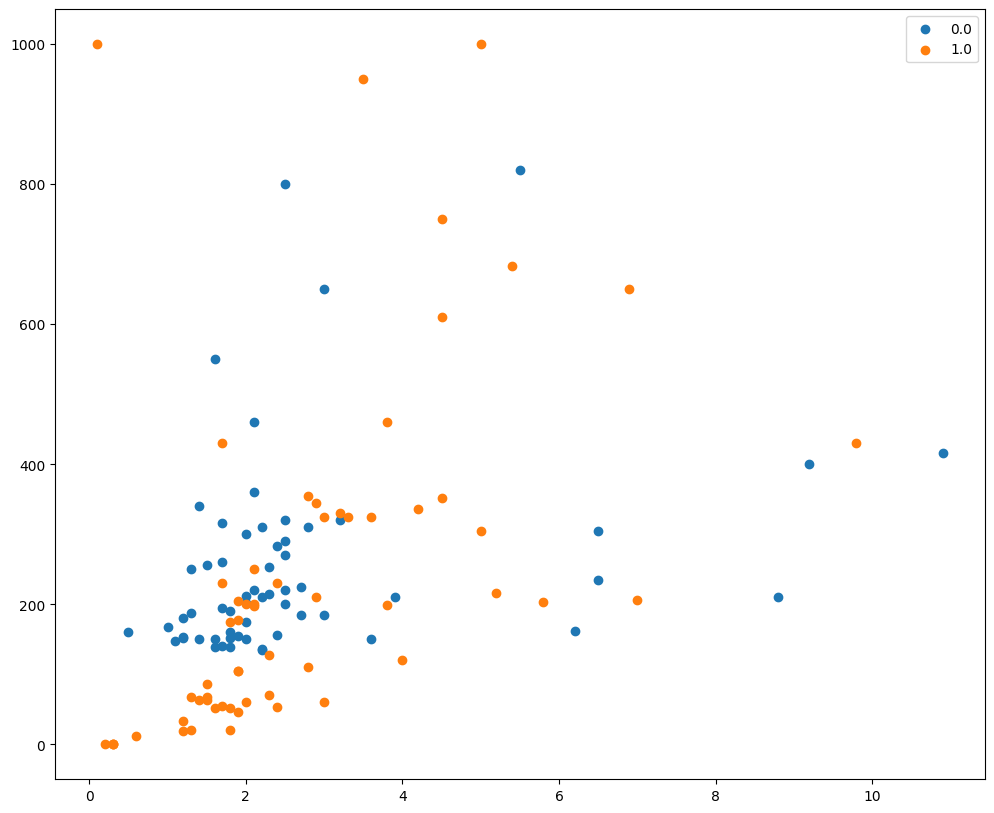

In [1548]:
# scatter plot of examples by class label
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss[row_ix, 0],
                   X_nearmiss[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

3. Adakah perbedaan yang kalian dapat dari dua model undersample yang kalian lakukan? Jelaskan dengan kata-kata anda sendiri! [5]

Pada kali ini saya melakukan undersample, dengan menggunakan random under sampling dan nearmiss. Pada penerapan random undersampling, teknik ini akan menghapus node-node dari class mayoritas secara random. Lalu pada nearmiss (saya menggunakan nearmiss tipe 2) dia akan mengevaluasi class-class mayoritas yang memilki rata-rata jarak minimimum ke tiga class minoritas yang terjauh untuk mendapatkan class mayoritas yang terdekat dengan class minoritas. Selain itu, dengan melihat persebaran visualisasnya diketahui data dari nearmiss lebih tersebar karena fokusnya mengevaluasi class yang ada berbeda dengan random undersampling yang menghapus node

### Bagian 2

Lakukan klasifikasi pada data yang belum dan yang sudah di undersampling dengan metode MLP. Untuk data yang sudah di undersampling mahasiswa diminta untuk menerapkan stratified cross validation dan gunakan minimal satu model undersampling (Mahasiswa boleh pakai pipeline ataupun tidak).

1. Lakukanlah klasifikasi menggunakan MLPClassifier dengan data sebelum di undersample [8]

In [1549]:
classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')

classifier_log = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')

a. Lakukann training pada model MLPClassifier

In [1550]:
classifier_relu.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [1551]:
classifier_log.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

b. Lakukan prediksi data testing

In [1552]:
print("Hasil Prediksi MLPClassifier RELU:")
prediction_relu = classifier_relu.predict(X_test)
print(prediction_relu)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier RELU:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0

In [1553]:
print("Hasil Prediksi MLPClassifier Logistic:")
prediction_log = classifier_log.predict(X_test)
print(prediction_log)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Logistic:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 

c. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [1554]:
print("MLPClassifier RELU")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_relu, average='micro',zero_division=0))

MLPClassifier RELU
Nilai rata-rata akurasi: 0.921875
F1 Macro Average: 0.4796747967479675
F1 Micro Average: 0.921875
Precision Macro Average: 0.4609375
Precision Micro Average: 0.921875
Recall Macro Average: 0.5
Recall Micro Average: 0.921875


In [1555]:
print("MLPClassifier Logistic")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_log, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_log, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_log, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_log, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_log, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_log, average='micro',zero_division=0))

MLPClassifier Logistic
Nilai rata-rata akurasi: 0.921875
F1 Macro Average: 0.4796747967479675
F1 Micro Average: 0.921875
Precision Macro Average: 0.4609375
Precision Micro Average: 0.921875
Recall Macro Average: 0.5
Recall Micro Average: 0.921875


2. Lakukan klasifikasi pada data yang telah di undersampling dengan metode MLPClassifier dan menerapkan stratified cross validation (Mahasiswa boleh pakai pipeline ataupun tidak) [8]

In [1556]:
classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')

classifier_log = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')

a. Lakukan stratified cross validation dari hasil undersample yang telah dilakukan. Berikan hasilnya

In [1557]:
# This code may not be run on GFG IDE 
# as required packages are not found. 
    
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }
  

                   
   
print("Stratifield KFold ReLU")
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_undersample)
  
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_scaled, y_undersample):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_undersample[train_index], y_undersample[test_index]
    classifier_relu.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier_relu.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Stratifield KFold ReLU
List of possible accuracy: [0.5833333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.75, 0.6666666666666666, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334]

Maximum Accuracy That can be obtained from this model is: 83.33333333333334 %

Minimum Accuracy: 58.333333333333336 %

Overall Accuracy: 73.33333333333334 %

Standard Deviation is: 0.10243938285880987


In [1558]:
# This code may not be run on GFG IDE 
# as required packages are not found. 
    
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }
  
                   
print("Stratifield KFold Logistic")

lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_scaled, y_undersample):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_undersample[train_index], y_undersample[test_index]
    classifier_log.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier_log.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Stratifield KFold Logistic


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Opti

List of possible accuracy: [0.5833333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.75, 0.6666666666666666, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334]

Maximum Accuracy That can be obtained from this model is: 83.33333333333334 %

Minimum Accuracy: 58.333333333333336 %

Overall Accuracy: 73.33333333333334 %

Standard Deviation is: 0.10243938285880987


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


b.Lakukann training pada model MLPClassifier dengan data training yang telah di undersample.

In [1559]:
classifier_relu.fit(X_undersample, y_undersample)

classifier_log.fit(X_undersample, y_undersample)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

c. Lakukann prediksi data testing

In [1560]:
print("Hasil Prediksi MLPClassifier RELU:")
prediction_relu = classifier_relu.predict(X_test)
print(prediction_relu)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier RELU:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0

In [1561]:
print("Hasil Prediksi MLPClassifier Logistic:")
prediction_log = classifier_log.predict(X_test)
print(prediction_log)

print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier Logistic:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Ground Truth / Dataset Test Asli
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 

d. Tampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score

In [1562]:
print("MLPClassifier RELU")

print("Nilai rata-rata akurasi:", classifier_relu.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, prediction_relu, average='micro',zero_division=0))

MLPClassifier RELU
Nilai rata-rata akurasi: 0.09375
F1 Macro Average: 0.09019607843137255
F1 Micro Average: 0.09375
Precision Macro Average: 0.5396825396825397
Precision Micro Average: 0.09375
Recall Macro Average: 0.5084745762711864
Recall Micro Average: 0.09375


In [1563]:
print("MLPClassifier Logistic")

print("Nilai rata-rata akurasi:", classifier_log.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, prediction_log, average='macro'))
print('F1 Micro Average:', f1_score(y_test, prediction_log, average='micro'))
print('Precision Macro Average:', precision_score(y_test, prediction_log, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, prediction_log, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, prediction_log, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test
, prediction_log, average='micro',zero_division=0))

MLPClassifier Logistic
Nilai rata-rata akurasi: 0.078125
F1 Macro Average: 0.07246376811594203
F1 Micro Average: 0.078125
Precision Macro Average: 0.0390625
Precision Micro Average: 0.078125
Recall Macro Average: 0.5
Recall Micro Average: 0.078125


3. Bandingkan hasil dari MLPClassifier: [6] 

*   Tanpa undersample dan dengan undersample [3]. 
*   Perbedaan antara kedua activation function yang dipilih. Menurut anda mana yang lebih baik digunakan ReLU atau Logistic (Sigmoid) Function? [3].

Berikan analisis anda!

1. Diketahui dengan melakukan teknik undersample, akurasi yang dihasilkan lebih rendah dibanding model yang tidak melakukan undersample. Dengan demikian, model tanpa undersample ini lebih baik dibandingkan model dengan undersample. Hal ini juga didukung dengan beberapa metrik evaluasi lainnya, seperti presisi, recall, dan F1-score

2. Penggunaan Logistic lebih buruk dibanding ReLU. Hal itu disebabkan nilai dari metric lebih buruk dibandingkan ReLU, seperti akurasi, F1-score, precision, dan recall. Namun, perbedaan penggunaan Logistic dan RuLE tidak terlalu memiliki nilai perbedaan yang jauh dan masih lebih baik dibanding data yang tidak dioversampling. Selain itu, ini tidak selalu benar karena ketika dirun hasil dari akurasi data yang dioversampling ini bisa berbeda-beda dan tidak konstan, tetapi di kasus ini mayoritas RelU lebih baik dibanding ReLU

## Pertanyaan

1. Mengapa kita perlu menggunakan metode oversampling dan undersampling?

Seringkali saat kita mengolah data, kita menemukan bahwa proporsi data tidak seimbang atau yang biasa dikenal dengan unbalanced. Dengan menerapkan oversampling atau undersampling kita akan melakukan pengurangan atau penduplikasian dataset agar proporsinya seimbang. Masalah yang biasanya muncul apabila data bersifat unbalanced adalah masalah overfitting atau underfitting. Selain itu, Imbalanced data ini dapat menyebabkan banyak kesalahan dalam suatu pengklasifikasian terutama untuk kelas minoritas. Kelas minoritas akan lebih sulit untuk diprediksi karena hanya ada komposisi data pada kelas tersebut lebih sedikit jika dibandingkan dengan kelas mayoritas. Data yang tidak seimbang ini dapat pengklasifikasi bias terhadap kelas mayoritas.  Hal ini dikarenakan, pada kasus data tidak seimbang, model klasifikasi akan cenderung berfokus untuk mempelajari karakteristik data pada kelas mayoritas dan cenderung mengabaikan kelas minoritas.

2. Data seperti apa yang cocok untuk dilakukan proses undersampling atau oversampling?

Data yang cocok untuk diterapkan dengan oversampling atau undersampling adalah data yang unbalanced. Hal itu disebabkan rasio data minoritas mungkin akan kecil sekali dibanding data mayoritas. Misalkan pada data transaksi perbankan, transaksi yang berujung penipuan mungkin hanya ada 1-2% dari data keseluruhan. Sehingga akan ada 98-99% transaksi yang valid. Oleh karena rasio yang tidak seimbang, dilakukanlah oversampling atau undersampling ini. Contoh lain adalah misalkan perbandingan data minoritas dan mayoritas sangat jauh seperti 1:100000

3. Apa yang akan terjadi jika kita menggunakan nilai learning rate yang terlalu rendah ataupun terlalu tinggi?

Learning rate mengontrol bagaimana kecepatan neural network mempelajari model. Sejaitnya apabila nilai dari learning rate besar maka kecepatan dalam mempelajari model semakin cepat. Begitu pula apabila nilai learning ratennya rendah maka kecepetan dalam mempelajari model semakin lambat. Namun, biasanya penggunaan nilai learning rate yang lebih rendah akan menghasilkan model yang optimal. 

Apabila nilai learning rate diset terlalu tinggi maka model yang tercipta akan menghasilkan bobot yang besar dan model kurang stabil saat melakukan proses test. Selain itu, dapat menyebabkan juga nilai yang tiba-tiba naik secara signifikan, sehingga menyebabkan numerical overflow. Lalu, apabila learning rate diset terlalu rendah akan menghasilkan model yang konvergen.